In [2]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

In [2]:
group_2 = [
    'vk_2_eg', 'stahl_folder', 'r707lv_f4032', 
    'r707lv_f4034', 'r707lv_vari_air', 'og_3'
]

In [18]:
matern_kernel = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.MaternKernel(
        nu=1/2
    )
)

rq_kernel = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
    )
)

covar_module = matern_kernel

In [19]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('r707lv_f4032_15T', 15, True)

Iter 1 , Loss = 1.242032604287963 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.225716293061934 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.2099203072522917 , Noise = 0.5984556078910828
Iter 4 , Loss = 1.1949270205373221 , Noise = 0.5553362965583801
Iter 5 , Loss = 1.1810072557928653 , Noise = 0.5154428482055664
Iter 6 , Loss = 1.168371855048778 , Noise = 0.47920700907707214
Iter 7 , Loss = 1.1571056166111549 , Noise = 0.44720348715782166
Iter 8 , Loss = 1.1471049018989408 , Noise = 0.42008864879608154
Iter 9 , Loss = 1.1380766029335108 , Noise = 0.39840567111968994
Iter 10 , Loss = 1.1296549976228702 , Noise = 0.3823074400424957
Iter 11 , Loss = 1.1215855579084892 , Noise = 0.37140658497810364
Iter 12 , Loss = 1.1138274049011039 , Noise = 0.3648809492588043
Iter 13 , Loss = 1.1065114722930847 , Noise = 0.36169520020484924
Iter 14 , Loss = 1.099825738691407 , Noise = 0.3607618510723114
Iter 15 , Loss = 1.093912759088741 , Noise = 0.3610112965106964
Iter 16 , Loss = 1.08881472720147

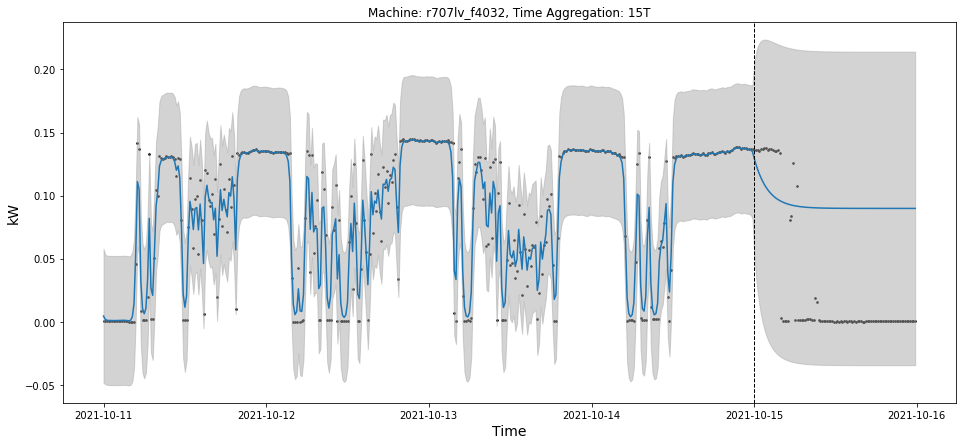

r707lv_f4032
-----------------------------------
Expected next day energy consumption    =  4.481115054447315 kWh
Upper bound next day energy consumption =  10.347939654570924 kWh
Lower bound next day energy consumption =  -1.3857095456762918 kWh


Abnormal High Energy Consumption
---------------------------------


Abnormal Low Energy Consumption
---------------------------------


In [20]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='15T',
    machine='r707lv_f4032',
    update_score=False
)   

In [7]:
mse, mape

(2.796447720094227e-05, 0.05379464921814899)

### 10T

In [9]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.083, 0.126) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.167, 0.209) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation


In [10]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('vk_2_eg_30T', 30, True)

Iter 1 , Loss = 1.1167325933146015 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.0860422000868042 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.0578813669127018 , Noise = 0.5982540845870972
Iter 4 , Loss = 1.034519570589345 , Noise = 0.5545238852500916
Iter 5 , Loss = 1.016989282242349 , Noise = 0.5133202075958252
Iter 6 , Loss = 1.0029779132467664 , Noise = 0.4746778905391693
Iter 7 , Loss = 0.9891673703587464 , Noise = 0.4386254549026489
Iter 8 , Loss = 0.974480447016517 , Noise = 0.4051511883735657
Iter 9 , Loss = 0.9593008503451905 , Noise = 0.37420448660850525
Iter 10 , Loss = 0.9444954295627985 , Noise = 0.3457084596157074
Iter 11 , Loss = 0.9311038585661806 , Noise = 0.3195689618587494
Iter 12 , Loss = 0.9202051139326329 , Noise = 0.29568687081336975
Iter 13 , Loss = 0.9120358580878859 , Noise = 0.27397993206977844
Iter 14 , Loss = 0.9053210593234681 , Noise = 0.25439631938934326
Iter 15 , Loss = 0.8990413582122293 , Noise = 0.2368994802236557
Iter 16 , Loss = 0.89371013735091

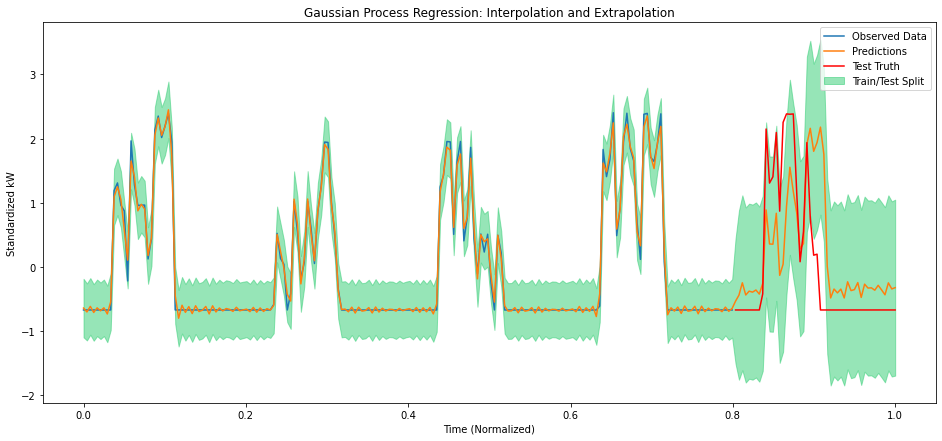

Points outside of confidence region: [2.25321257 2.38491068]


In [11]:
model, likelihood, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine='vk_2_eg',
    update_score=False
)   

In [12]:
mse, mape

(0.8419735761654904, 1.0628913651431569)